In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_dist(N=1000,scale=1,nodes=10):
    x=np.linspace(0,nodes-1,nodes)
    dist= np.exp(-np.abs(x)/2/scale**2)
    dist/=dist.sum()
    return N*dist

def pareto_dist(N=1000,scale=1,shape=1,nodes=10):
    x=np.linspace(scale,scale+nodes-1,nodes)
    dist= (shape * (scale**shape))/ (x**(shape+1))
    dist/=dist.sum()
    return N*dist

def flat_dist(N=1000,nodes=10):
    return [N/nodes]*nodes
    # dist= (shape * (scale**shape))/ (x**(shape+1))
    # dist/=dist.sum()
    # return N*dist

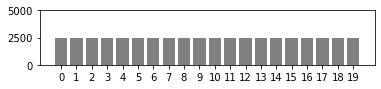

In [29]:
nodes=20
fig, ax = plt.subplots(figsize=(6, 1))
plt.bar(np.arange(nodes),flat_dist(N=50000,nodes=nodes),color="gray")
plt.ylim([0, 5000])
plt.xticks([i for i in range(nodes)])
plt.show()

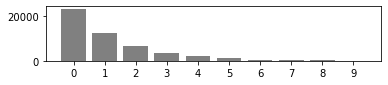

In [13]:
nodes=10
fig, ax = plt.subplots(figsize=(6, 1))
plt.bar(np.arange(nodes),gaussian_dist(N=50000,scale=0.9,nodes=nodes),color="gray")
# plt.ylim([0, 5000])
plt.xticks([i for i in range(nodes)])
plt.show()

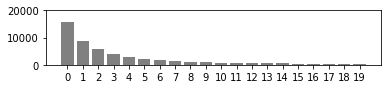

In [27]:
nodes=20
fig, ax = plt.subplots(figsize=(6, 1))
plt.bar(np.arange(nodes),pareto_dist(N=50000,scale=3, shape=1,nodes=nodes),color="gray")
plt.xticks([i for i in range(nodes)])
plt.ylim([0, 20000])
plt.yticks([0,10000,20000])
plt.show()

In [33]:
from scipy.stats import dirichlet

def dirichlet_func(N=1000,nodes=10, random_state=None, **kwargs):
    alpha = np.ones(nodes)/nodes
    samples = dirichlet.rvs(alpha, size=1, random_state=random_state) * N
    res = list(samples.squeeze())
    res = [int(i) for i in res]
    res = [i if i>0 else 1 for i in res]
    res.sort(reverse=True)
    return np.asarray(res)


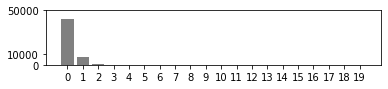

In [34]:
fig, ax = plt.subplots(figsize=(6, 1))
plt.bar(np.arange(nodes),dirichlet_func(N=50000,scale=3, shape=1, nodes=nodes, random_state=1),color="gray")
plt.xticks([i for i in range(nodes)])
plt.ylim([0, 20000])
plt.yticks([0,10000,50000])
plt.show()

In [23]:
dirichlet_func(N=5000,scale=3, shape=1, nodes=nodes, random_state=1)

array([4999,    0])